In [2]:
# %pip install mplcursors

import pandas as pd
from astropy.io import fits
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
import datetime
import aperphot_moving
from aperphot_moving import TargetLoc

from importlib import reload

from os.path import exists

In [136]:
# # read in images table

# imgs = pd.read_csv('img_master_spreadsheet.csv')

# imgs['timestamp'] = imgs['timestamp'].apply(parse)

# def _get_aligned_img_path(fp: str):
#     return str(Path('./aligned/').joinpath(Path(fp).name.rstrip('.fits') + '_affineremap.fits'))

# imgs['aligned_filepath'] = imgs['filepath'].apply(_get_aligned_img_path)
# imgs['ok'] = imgs['aligned_filepath'].apply(exists)

# okay = imgs['ok'] == True

# #imgs.sort_values('timestamp', inplace=True)

# imgs
# # PLEASE RUN THE FILTER CELL AFTER THIS (see above)

In [3]:
imgs = pd.DataFrame(
    columns=('aligned_filepath', 'timestamp', 'ok'),
    #dtype=(str, datetime, str)
)

def _get_time(fp:str):
    name = Path(fp).name.split('__')[0].lstrip('combined_')
    return parse(name)
    #return datetime.datetime.strptime(name, 'combined_%Y-%m-%dT%X.0000')




imgs['aligned_filepath'] = glob.glob(f"aligned/*.fits")

imgs['timestamp'] = imgs['aligned_filepath'].apply(_get_time)

imgs.sort_values('timestamp', inplace=True)

imgs['ok'] = True
okay = imgs['ok']

In [4]:
# FILTER CELL

night_1 = (imgs['timestamp'] >= parse('2022-11-11T05:51:00')) & (imgs['timestamp'] < parse('2022-11-12T00:00:00'))



night_2_group_1 = (
    (parse('2022-11-12T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-12T05:59:20'))
    )

night_2_group_2 = (
    (parse('2022-11-12T06:51:36') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-12T07:21:36'))
    )


# night_3 = (
#     (parse('2022-11-13T00:00:00') <= imgs['timestamp']) & 
#     (imgs['timestamp'] < parse('2022-11-14T00:00:00'))
#     )

night_3_group_1 = (
    (parse('2022-11-13T00:00:00') <= imgs['timestamp']) & 
    (imgs['timestamp'] < parse('2022-11-13T04:59:20'))
    )

night_3_group_2 = (
    (parse('2022-11-13T04:59:20') <= imgs['timestamp'])
    )

In [9]:
sum(night_1)

40

# Photometry

In [98]:
# click on image to print its coordinates and timestamp!
# MAKE SURE TO RUN pip install mplcursors
# use vmin and vmax to change image brightness
%matplotlib tk


aperphot_moving.get_coords_of_point(imgs.loc[night_2_group_2 & okay, 'aligned_filepath'], vmin=0, vmax=500)

TargetLoc(x=595.8000000000001, y=455.0999999999999, t='2022-11-12T06:51:36.0000')


In [99]:
# RELOAD aperphot_moving.py 

globals()['aperphot_moving'] = reload(aperphot_moving)
globals()['TargetLoc'] = aperphot_moving.TargetLoc

In [79]:
# NIGHT 1

%matplotlib tk

FWHM = 13

photometry_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay&night_1]['aligned_filepath'],

    start_object=TargetLoc(x=723.7147046501888, y=944.1470203183914, t='2022-11-11T06:14:00.0000'),

    end_object=TargetLoc(x=676.7723412773491, y=948.8662977890997, t='2022-11-11T06:01:00.0000'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(620.9218422706329, 187.40594888981994),
        TargetLoc(885.0793838196438, 538.3439309608142)
    ],

    vmax=400
 
)

photometry_1

DryRunDone: #not_an_error

In [80]:
# Night 2 group 1

%matplotlib tk

FWHM = 10

photometry_2_group_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay & night_2_group_1]['aligned_filepath'],

    start_object=TargetLoc(x=651, y=983, t='2022-11-12T02:49:48'),

    end_object= TargetLoc(x=1088, y=938, t='2022-11-12T04:51:31'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(1009.8564266803644, 511.4699819071131),
        TargetLoc(1445.0230224321135, 583.3006409175242) # THIS IS A BAD REFERENCE
    ]

)

photometry_2_group_1

/Users/student/anaconda3/envs/astroconda4/lib/python3.8/site-packages/mplcursors/_pick_info.py:162: UserWarning: Pick support for Circle is missing.
  warnings.warn(f"Pick support for {type(artist).__name__} is missing.")


TargetLoc(x=1235.65, y=515.3999999999999, t='2022-11-12T04:53:31')
TargetLoc(x=1141.8500000000001, y=585.75, t='2022-11-12T04:42:31')


DryRunDone: #not_an_error

In [56]:
# Night 2 group 2

%matplotlib tk

FWHM = 10

photometry_2_group_2 = aperphot_moving.do_photometry_with_timestamps(
    imgs[okay & night_2_group_2]['aligned_filepath'],

    start_object = TargetLoc(x=413.19010416666663, y=629.090625, t='2022-11-12T06:51:36.0000'),
    end_object = TargetLoc(x=517.3820833333334, y=615.0904166666666, t='2022-11-12T07:20:36.0000'),

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=False, # in the dry run, press 'b' and 'n' to cycle through the images

    reference_positions=[
        TargetLoc(x=594.125, y=452.19666666666666,),
        TargetLoc(x=1235.1614583333333, y=679.7175, ),
        #TargetLoc(x=1494.605, y=740.3525,)], # THIS IS A BAD REFERENCE STAR
    ],
    
    vmin = 0,
    vmax = 600 # corrects brightness in plot

)

photometry_2_group_2

,target_subtracted_counts,timestamp,star_0_subtracted_counts,star_1_subtracted_counts,uncalibrated_target_mag,star_subtracted_counts_mean,uncalibrated_star_0_mag,uncalibrated_star_1_mag,uncalibrated_star_mag_mean,differential_counts,differential_mag
0,2911.018279,2022-11-12 06:51:36,91641.488119,32975.312774,-6.160112,62308.400447,-9.905230,-8.795472,-9.486367,-59397.382167,3.326254
1,4075.176698,2022-11-12 06:52:36,91164.749866,33994.932567,-6.525366,62579.841216,-9.899567,-8.828535,-9.491086,-58504.664519,2.965720
2,5015.237273,2022-11-12 06:53:36,91147.500287,34256.050389,-6.750729,62701.775338,-9.899362,-8.836843,-9.493200,-57686.538065,2.742471
3,3971.895577,2022-11-12 06:54:36,90914.395633,33636.374261,-6.497495,62275.384947,-9.896582,-8.817023,-9.485791,-58303.489370,2.988296
4,3215.183377,2022-11-12 06:55:36,91298.812914,33911.377481,-6.268014,62605.095198,-9.901163,-8.825864,-9.491524,-59389.911820,3.223510
5,3412.560615,2022-11-12 06:56:36,90469.148441,34195.498940,-6.332701,62332.323690,-9.891251,-8.834922,-9.486783,-58919.763075,3.154082
6,4448.085076,2022-11-12 06:57:36,89648.506008,34045.528525,-6.620433,61847.017267,-9.881358,-8.830150,-9.478297,-57398.932191,2.857864
7,3096.393388,2022-11-12 06:58:36,89779.533158,33451.770446,-6.227140,61615.651802,-9.882943,-8.811048,-9.474228,-58519.258414,3.247087
8,4261.484531,2022-11-12 06:59:36,90337.409744,34150.617464,-6.573902,62244.013604,-9.889669,-8.833496,-9.485244,-57982.529073,2.911342
9,3428.939110,2022-11-12 07:00:36,90819.729203,33628.830661,-6.337899,62224.279932,-9.895451,-8.816779,-9.484900,-58795.340822,3.147000


In [86]:
# Night 3

#1211.797141170518, 858.9736043177603, '2022-11-13T06:35:57.0000'

#617.4767807949628, 932.9911452184181, '2022-11-13T03:51:33.0000'

%matplotlib tk

FWHM = 17

photometry_3_group_1 = aperphot_moving.do_photometry_with_timestamps(
    imgs[night_3_group_1]['aligned_filepath'],

    start_object= TargetLoc(x=343.90791666666667, y=829.6858333333333, t='2022-11-13T02:53:46'),

    end_object = TargetLoc(x=622.2231250000001, y=788.76, t='2022-11-13T04:11:53'), 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(x=133.19053117782914, y=389.4307159353348, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),
        TargetLoc(x=446.9919168591224, y=1302.9826789838337, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),
        TargetLoc(x=532.405311778291, y=1186.0034642032333, t=datetime.datetime(2022, 11, 13, 2, 8, 26)),

    ]

)

photometry_3_group_1

DryRunDone: #not_an_error

In [53]:
# Night 3 group 2 -  BAD

#1211.797141170518, 858.9736043177603, '2022-11-13T06:35:57.0000'

#617.4767807949628, 932.9911452184181, '2022-11-13T03:51:33.0000'

%matplotlib tk

FWHM = 17

photometry_3_group_2 = aperphot_moving.do_photometry_with_timestamps(
    imgs[night_3_group_2]['aligned_filepath'],

    start_object=TargetLoc(x=1043.736875, y=826.7127083333334, t='2022-11-13T06:05:57'),
    end_object=TargetLoc(x=1115.05, y=816.9, t='2022-11-13T06:24:57')
, 

    aperture_=FWHM*3,
    annulus_inner=5*FWHM,
    annulus_outer=9*FWHM,
    dry_run=True,

    reference_positions=[
        TargetLoc(x=455.1, y=1399.8, t='2022-11-13T06:03:57'),
        TargetLoc(x=542.2, y=1279.2, t='2022-11-13T06:03:57'),
    ],

    vmax=255,
    vmin=200

)

photometry_3_group_2

# this seems not viable!

DryRunDone: #not_an_error

In [35]:
# #photometry_3.to_csv('photometry_3.csv')

# photometry_3 = pd.read_csv('photometry_3.csv')
# photometry_3['timestamp'] = photometry_3['timestamp'].apply(parse)

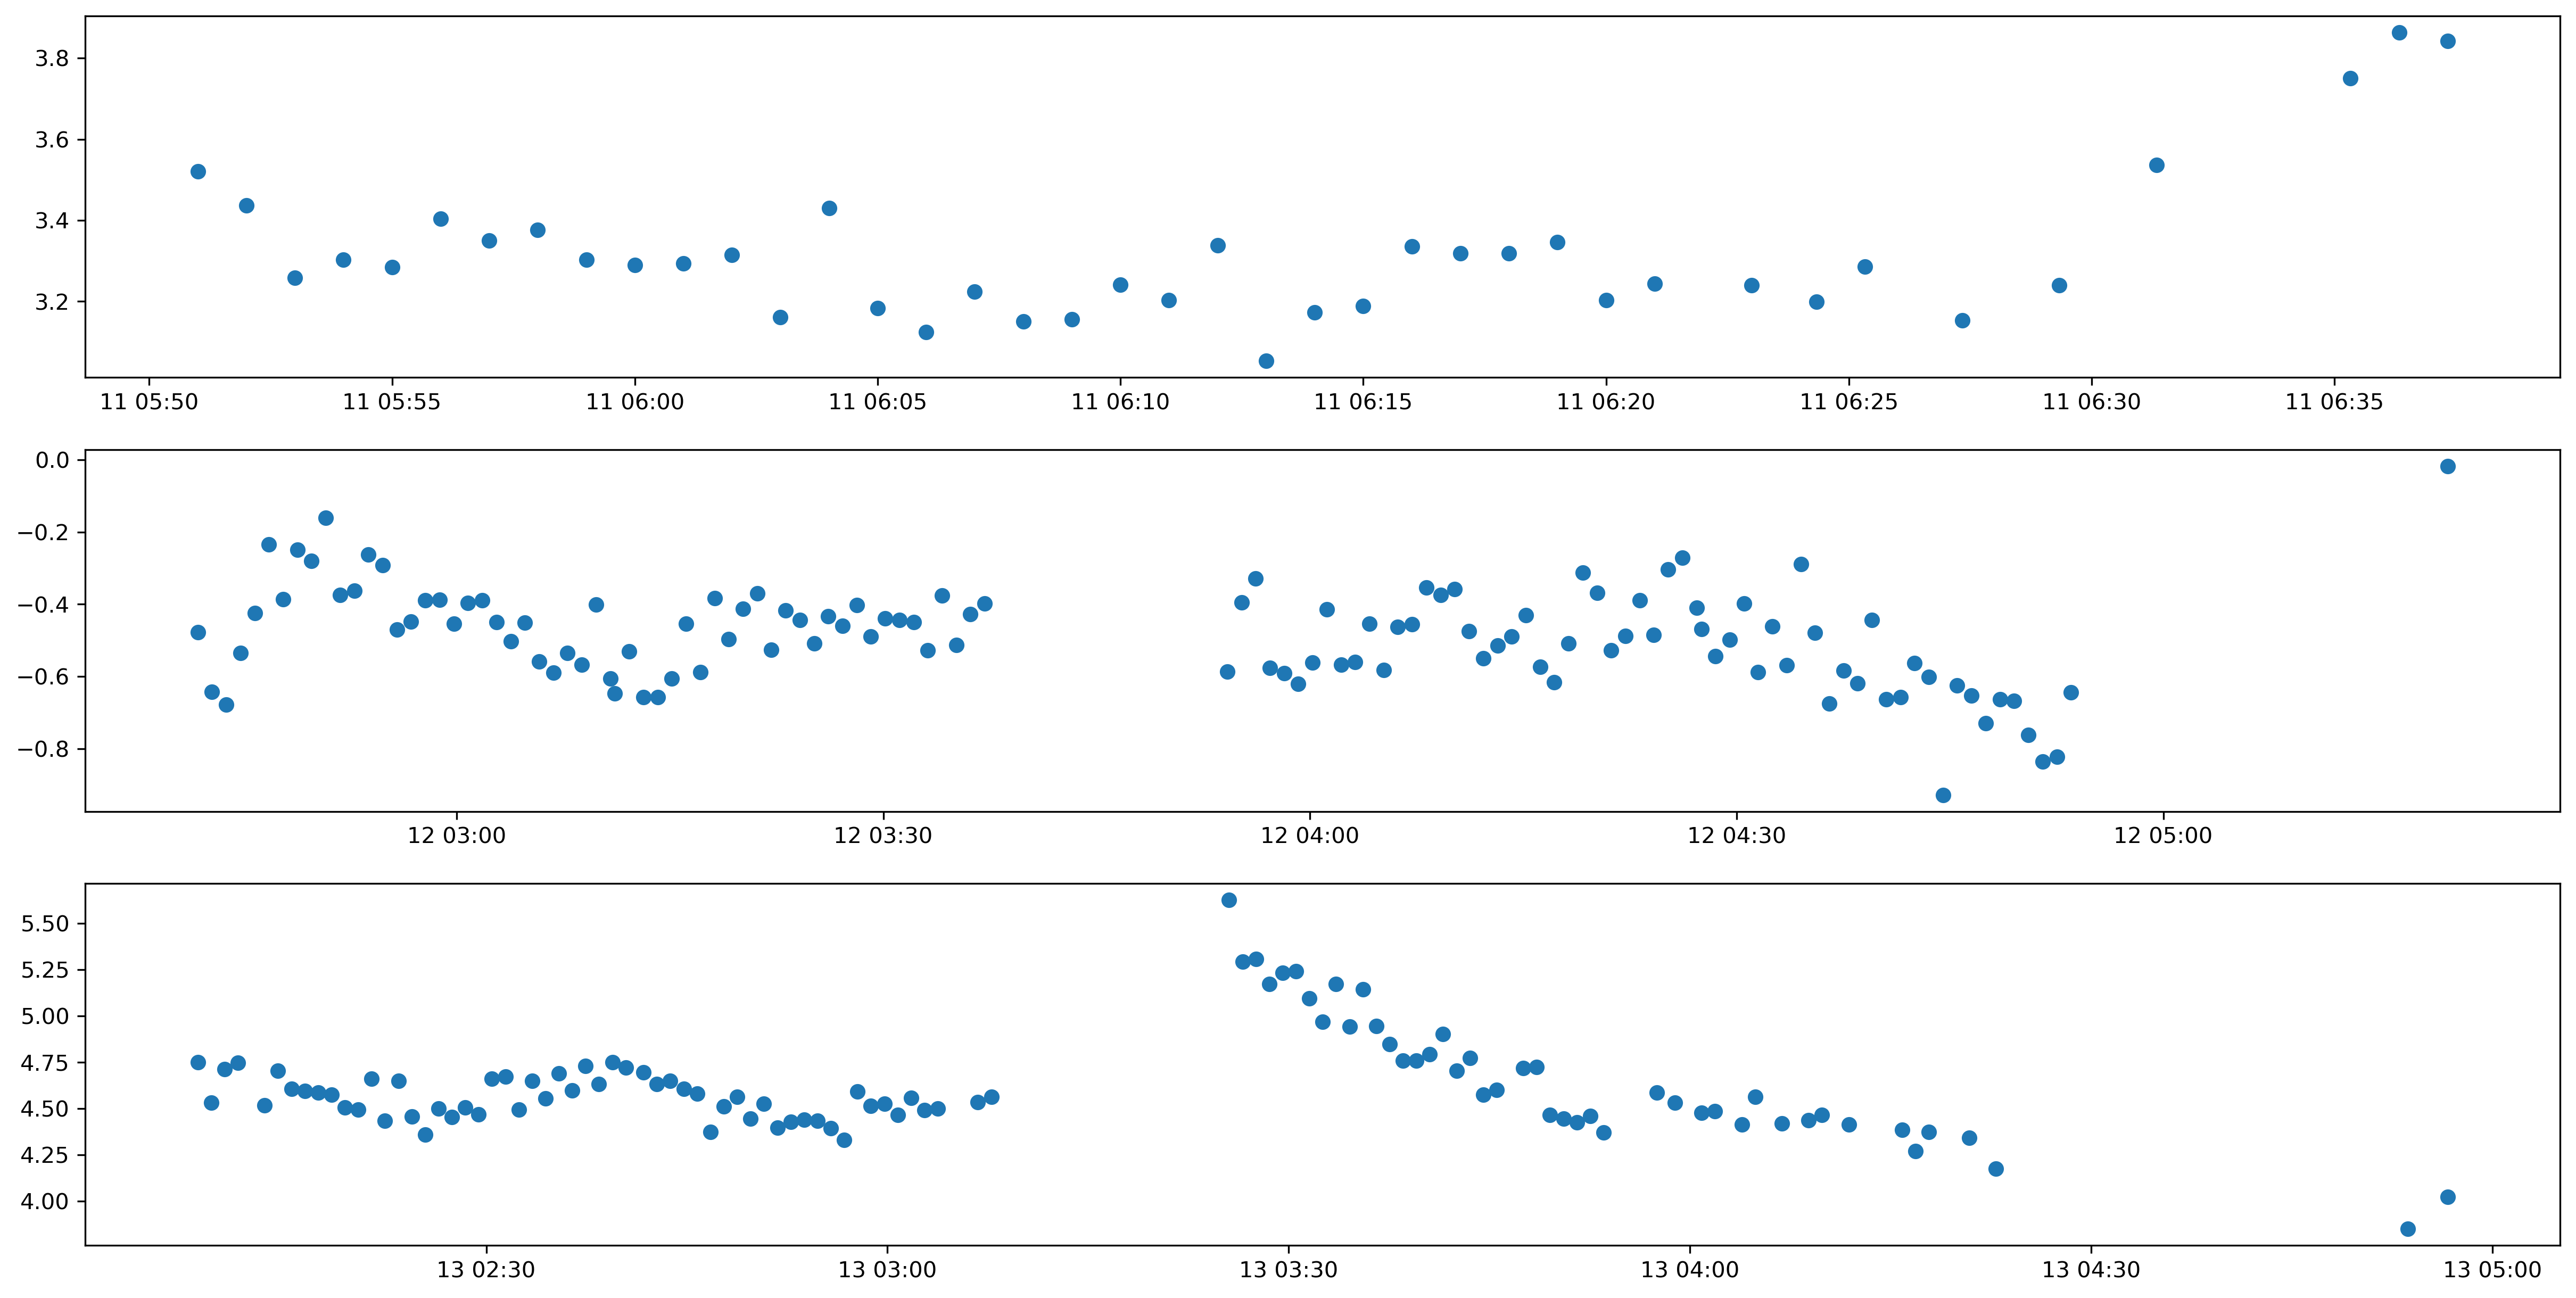

In [38]:
%matplotlib inline
# does not include photometry group 2 night 2
data = photometry_3_group_1

fig, axes = plt.subplots(3)

fig.set_dpi(300)
fig.set_figheight(10)
fig.set_figwidth(20)

for data, ax in zip((photometry_1, photometry_2_group_1, photometry_3_group_1), axes):
    ax.scatter(data['timestamp'], data['differential_mag'])


In [84]:
def blot(ax, y_lim, t1, t2, color='orange'):
    ax.fill_betweenx(np.linspace(*y_lim, 100, dtype=float), parse(t1), parse(t2), color=color, alpha=0.4)

Text(0.02, 0.5, 'Mag (relative to mean)')

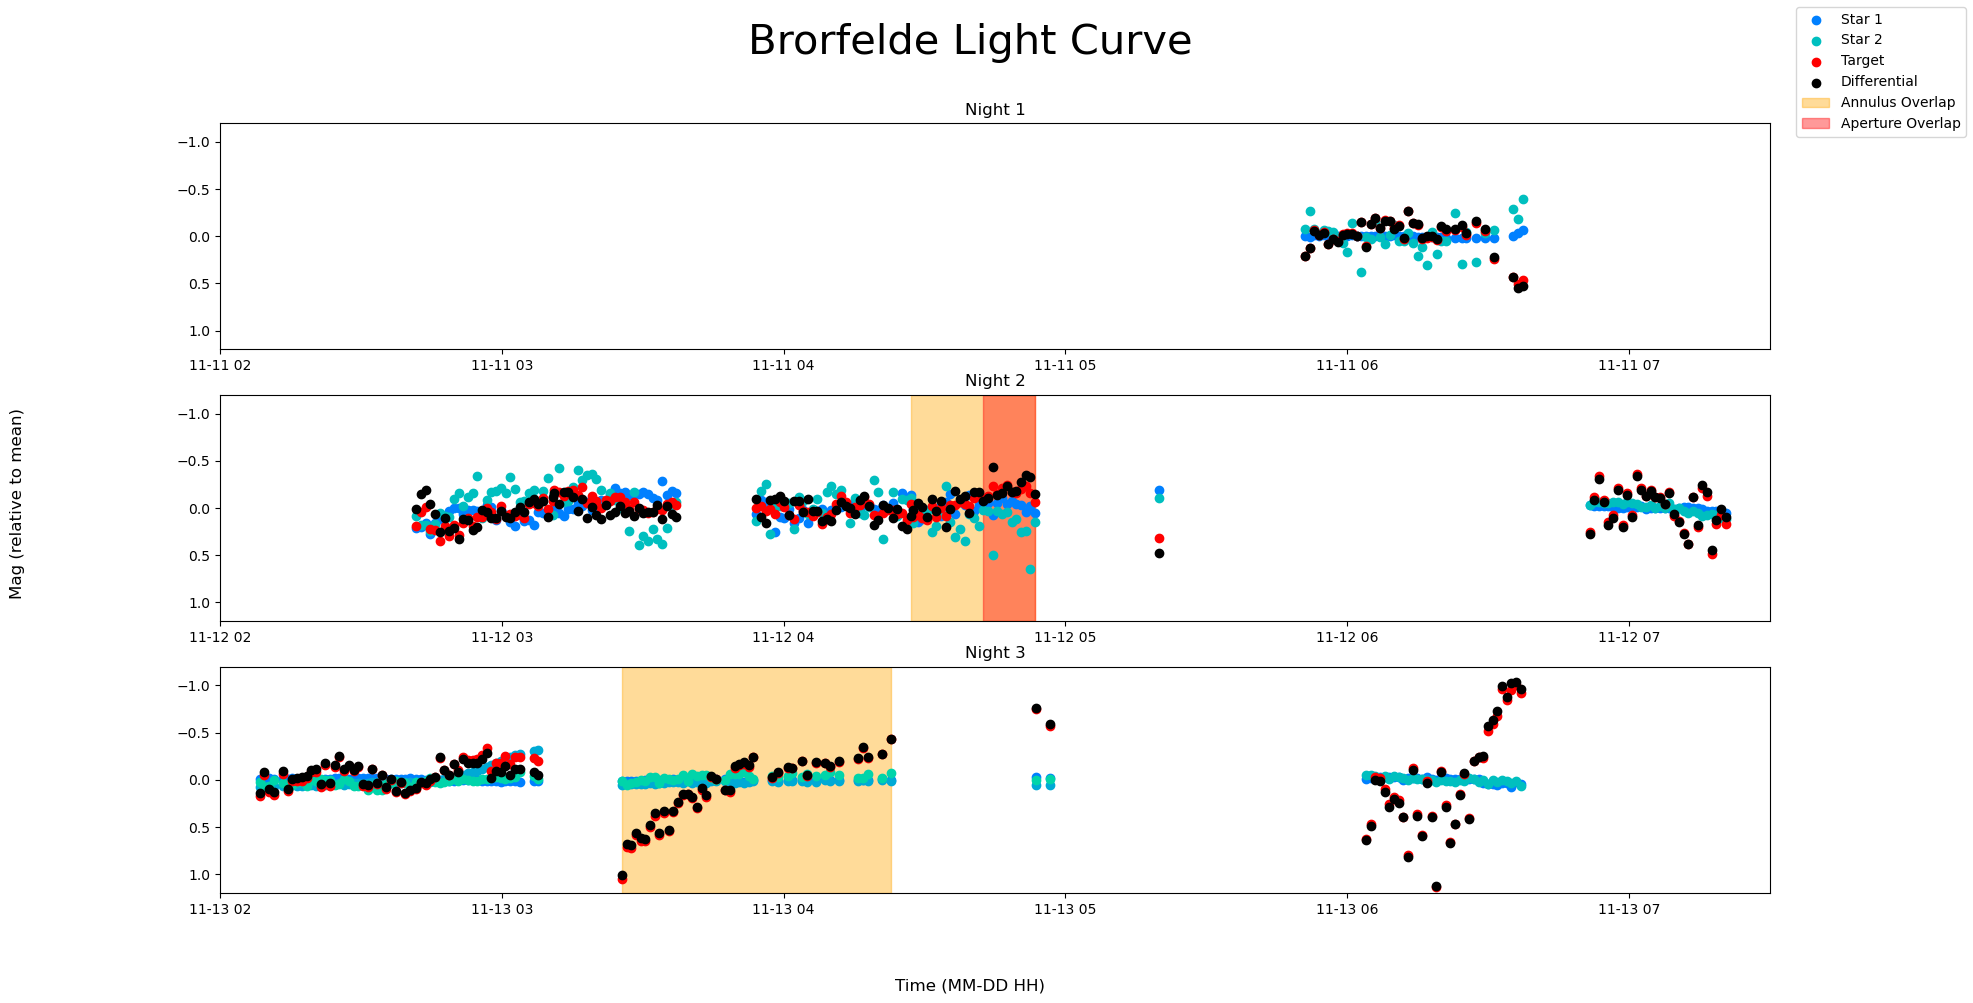

In [115]:
%matplotlib inline


fig, axes = plt.subplots(3)
fig.set_figheight(10)
fig.set_figwidth(20)


#times when the object's aperture or annulus visibly crossed over a star in the field
y_lim = (-1.2, 1.2)
blot(axes[1], y_lim, '2022-11-12T04:27:11', '2022-11-12T04:53:31')
blot(axes[2], y_lim, '2022-11-13T03:25:33', '2022-11-13T04:22:53')
blot(axes[1], y_lim, '2022-11-12T04:53:31', '2022-11-12T04:42:31', color='red')


for data, ax_num in (photometry_1, 0), (photometry_2_group_1, 1), (photometry_2_group_2, 1), (photometry_3_group_1, 2), (photometry_3_group_2, 2):
    ax = axes[ax_num]
    # for y_name, color in ('uncalibrated_star_mag', 'cyan'), ('uncalibrated_target_mag', 'black'), ('differential_mag', 'red'):

    
    # count ref stars
    for i in range(10000000):
        if (y_name := f"uncalibrated_star_{i}_mag") not in data.columns:
            n = i
            break
    
    bg_star_colors = [(0, 0.5 + g/2/n, 1 - g/2/n) for g in range(n)]

    for i in range(n):
        y_name = f"uncalibrated_star_{i}_mag"
        ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color=bg_star_colors[i])

    
    
    y_name = 'uncalibrated_target_mag'
    ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color='red')

    y_name = 'differential_mag'
    ax.scatter(data['timestamp'],data[y_name] - np.mean(data[y_name]), color='black')

    ax.set_ylim(y_lim)

for i, (data, ax) in enumerate(zip([photometry_1, photometry_2_group_1, photometry_3_group_1], axes)):
        t_0 = parse('2022-11-11T2:00:00') + timedelta(days=i)

        ax.set_xlim((t_0, t_0 + timedelta(hours=5, minutes=30)))
        
        ax.invert_yaxis()
    # ax.scatter(data['timestamp'],data['uncalibrated_star_mag'])
    # ax.scatter(data['timestamp'],data['differential_mag'])

axes[0].set_title('Night 1')
axes[1].set_title('Night 2')
axes[2].set_title('Night 3')


fig.legend(['Star 1', 'Star 2', 'Target', 'Differential', 'Annulus Overlap', 'Aperture Overlap'])
fig.suptitle('Brorfelde Light Curve', size=30)

fig.supxlabel('Time (MM-DD HH)')
fig.supylabel('Mag (relative to mean)')


In [100]:
%matplotlib tk
# troubleshooting missed data?
imgs_unaligned = pd.DataFrame(
    columns=('filepath', 'timestamp', 'ref_img'),
    #dtype=(str, datetime, str)
)

def _get_time(fp:str):
    name = Path(fp).name.split('__')[0].lstrip('combined_')
    return parse(name)
    #return datetime.datetime.strptime(name, 'combined_%Y-%m-%dT%X.0000')




imgs_unaligned['filepath'] = glob.glob(f"processed/*.fits")

imgs_unaligned['timestamp'] = imgs_unaligned['filepath'].apply(_get_time)


imgs_unaligned.sort_values('timestamp', inplace=True)

imgs_unaligned

,filepath,timestamp,ref_img
462,processed/combined_2022-11-11T04:29:55.0000__B...,2022-11-11 04:29:55,NaN
466,processed/combined_2022-11-11T04:30:55.0000__B...,2022-11-11 04:30:55,NaN
637,processed/combined_2022-11-11T04:31:55.0000__B...,2022-11-11 04:31:55,NaN
412,processed/combined_2022-11-11T04:32:55.0000__B...,2022-11-11 04:32:55,NaN
539,processed/combined_2022-11-11T04:33:55.0000__B...,2022-11-11 04:33:55,NaN
...,...,...,...
407,processed/combined_2022-11-13T06:59:17.0000__B...,2022-11-13 06:59:17,NaN
22,processed/combined_2022-11-13T07:00:17.0000__B...,2022-11-13 07:00:17,NaN
481,processed/combined_2022-11-13T07:01:17.0000__B...,2022-11-13 07:01:17,NaN
564,processed/combined_2022-11-13T07:02:17.0000__B...,2022-11-13 07:02:17,NaN


In [101]:
t = imgs_unaligned['timestamp']
filt = (t > parse('2022-11-13T04:30:00')) & (t < parse('2022-11-13T06:00:00'))

aperphot_moving.get_coords_of_point(imgs_unaligned.loc[filt, 'filepath'])



TargetLoc(x=183.75, y=652.75, t='2022-11-13T04:51:40')
TargetLoc(x=307.70000000000005, y=418.25, t='2022-11-13T04:51:40')
TargetLoc(x=351.25, y=793.4499999999999, t='2022-11-13T04:51:40')
TargetLoc(x=304.35, y=820.25, t='2022-11-13T04:51:40')
TargetLoc(x=364.65, y=1071.5, t='2022-11-13T04:51:40')
TargetLoc(x=528.8000000000001, y=1131.8, t='2022-11-13T04:51:40')
TargetLoc(x=528.8000000000001, y=1208.85, t='2022-11-13T04:51:40')
TargetLoc(x=528.8000000000001, y=1212.2, t='2022-11-13T04:51:40')
TargetLoc(x=120.10000000000002, y=431.64999999999986, t='2022-11-13T04:51:40')
TargetLoc(x=435.0, y=1339.5, t='2022-11-13T04:51:40')
TargetLoc(x=656.1, y=682.9, t='2022-11-13T04:51:40')
TargetLoc(x=984.4000000000001, y=424.95000000000005, t='2022-11-13T04:51:40')
TargetLoc(x=475.20000000000005, y=699.65, t='2022-11-13T05:23:40')
TargetLoc(x=478.55000000000007, y=843.6999999999999, t='2022-11-13T05:23:40')
TargetLoc(x=63.150000000000034, y=971.0, t='2022-11-13T05:24:40')
TargetLoc(x=63.1500000000000